In [1]:
import sys
import os
import time
import numpy as np
import pandas as pd
import umap

os.environ['NOVA_HOME'] = '/home/projects/hornsteinlab/Collaboration/NOVA'
print('NOVA_HOME is at', os.getenv('NOVA_HOME'))
sys.path.insert(1, os.getenv('NOVA_HOME'))


from manuscript.plot_config import PlotConfig
from src.common.utils import load_config_file
from src.embeddings.embeddings_utils import load_embeddings
from src.figures.distances_plotting import *
from src.analysis.analyzer_distances_utils import summarize_times, merge_batches_by_key, correlate_columns

%load_ext autoreload
%autoreload 2

NOVA_HOME is at /home/projects/hornsteinlab/Collaboration/NOVA
NOVA_HOME: /home/projects/hornsteinlab/Collaboration/NOVA


In [ ]:
dist_folder = '/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne_new/distances'

## Multiplexed

### Plate 1

In [ ]:
df2 = pd.read_csv(f'{dist_folder}/batch1_all_reps_Ctrl-EDi022_C9-CS2YNL_SALSPositive-CS2FN3_SALSNegative-CS0ANK_Untreated_without_CD41/distances_stats_euclidean_detailed_multiplexed.csv')
for col in ['label1','label2']:
    df2[col] = df2[col].str.split(pat='_', n=1).str[0]

In [ ]:
df2.head()

In [ ]:
plot_custom_boxplot(df2)

In [ ]:
plot_dist_histogram(df2)

In [ ]:
plot_distances_heatmap(df2, figsize=(6,6),)# highlight_thresh=df2[df2.label1 == df2.label2]['p50'].max())

In [ ]:
plot_cluster_proximity_network(df2, threshold = df2['p50'].quantile(0.9), figsize=(7,7))

### Plate 2

In [ ]:
df2 = pd.read_csv(f'{dist_folder}/batch1_all_reps_Ctrl-EDi029_C9-CS7VCZ_SALSPositive-CS4ZCD_SALSNegative-CS0JPP_Untreated_without_CD41/distances_stats_euclidean_detailed_multiplexed.csv')
for col in ['label1','label2']:
    df2[col] = df2[col].str.split(pat='_', n=1).str[0]

In [ ]:
df2.head()

In [ ]:
plot_custom_boxplot(df2)

In [ ]:
plot_dist_histogram(df2)

In [ ]:
plot_distances_heatmap(df2, figsize=(6,6),)# highlight_thresh=df2[df2.label1 == df2.label2]['p50'].max())

In [ ]:
plot_cluster_proximity_network(df2, threshold = df2['p50'].quantile(0.9), figsize=(7,7))

### Plate 3

In [ ]:
df2 = pd.read_csv(f'{dist_folder}/batch1_all_reps_Ctrl-EDi037_C9-CS8RFT_SALSPositive-CS7TN6_SALSNegative-CS6ZU8_Untreated_without_CD41/distances_stats_euclidean_detailed_multiplexed.csv')
for col in ['label1','label2']:
    df2[col] = df2[col].str.split(pat='_', n=1).str[0]

In [ ]:
df2.head()

In [ ]:
plot_custom_boxplot(df2)

In [ ]:
plot_dist_histogram(df2)

In [ ]:
plot_distances_heatmap(df2, figsize=(6,6),)# highlight_thresh=df2[df2.label1 == df2.label2]['p50'].max())

In [ ]:
plot_cluster_proximity_network(df2, threshold = df2['p50'].quantile(0.9), figsize=(7,7))

### All Plates 

In [ ]:
df2 = pd.read_csv(f'{dist_folder}/batch1_all_reps_all_cell_lines_Untreated_without_CD41/distances_stats_euclidean_detailed_multiplexed.csv')
for col in ['label1','label2']:
    df2[col] = df2[col].str.split(pat='_', n=1).str[0]

In [ ]:
df2.head()

In [ ]:
plot_custom_boxplot(df2)

In [ ]:
plot_dist_histogram(df2)

In [ ]:
plot_distances_heatmap(df2, )#figsize=(6,6), )#highlight_thresh=df2['p50'].median())

In [ ]:
plot_cluster_proximity_network(df2, threshold = df2['p50'].quantile(0.9), )#figsize=(7,7))

## not multiplexed

In [2]:
dist_folder = '/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne_new/distances'

# per patients

df = pd.read_csv(f'{dist_folder}/batch1_all_reps_all_cell_lines_Untreated_TDP43_DCP1A/distances_stats_euclidean.csv')
df

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p50
0,DCP1A_C9-CS2YNL_Untreated,DCP1A_C9-CS2YNL_Untreated,171,14535,3.390453,0.722545,0.562923
1,DCP1A_C9-CS2YNL_Untreated,DCP1A_C9-CS7VCZ_Untreated,171,20862,0.025864,0.000204,0.568686
2,DCP1A_C9-CS2YNL_Untreated,DCP1A_C9-CS8RFT_Untreated,171,23085,0.000206,0.000148,0.556474
3,DCP1A_C9-CS2YNL_Untreated,DCP1A_Ctrl-EDi022_Untreated,171,21375,0.000193,0.000110,1.098741
4,DCP1A_C9-CS2YNL_Untreated,DCP1A_Ctrl-EDi029_Untreated,171,21717,0.000187,0.000109,0.898393
...,...,...,...,...,...,...,...
295,TDP43_SALSPositive-CS2FN3_Untreated,TDP43_SALSPositive-CS4ZCD_Untreated,144,9936,0.000169,0.000109,0.873368
296,TDP43_SALSPositive-CS2FN3_Untreated,TDP43_SALSPositive-CS7TN6_Untreated,144,21312,0.000171,0.000107,0.951575
297,TDP43_SALSPositive-CS4ZCD_Untreated,TDP43_SALSPositive-CS4ZCD_Untreated,69,2346,0.000642,0.000091,0.645967
298,TDP43_SALSPositive-CS4ZCD_Untreated,TDP43_SALSPositive-CS7TN6_Untreated,69,10212,0.000169,0.000103,0.671700


In [ ]:
# # per groups

# df = pd.read_csv(f'{dist_folder}/batch1_all_reps_all_cell_lines_Untreated_TDP43_DCP1A_groups/distances_stats_euclidean.csv')
# df

In [3]:
df['marker1'] = df['label1'].str.split(pat='_', n=1).str[0]
df['marker2'] = df['label2'].str.split(pat='_', n=1).str[0]
df['condition1'] = df['label1'].str.split(pat='_', n=2).str[-1]
df['condition2'] = df['label2'].str.split(pat='_', n=2).str[-1]

df['label1'] = df['label1'].str.split(pat='_', n=2).str[1]
df['label2'] = df['label2'].str.split(pat='_', n=2).str[1]
df

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p50,marker1,marker2,condition1,condition2
0,C9-CS2YNL,C9-CS2YNL,171,14535,3.390453,0.722545,0.562923,DCP1A,DCP1A,Untreated,Untreated
1,C9-CS2YNL,C9-CS7VCZ,171,20862,0.025864,0.000204,0.568686,DCP1A,DCP1A,Untreated,Untreated
2,C9-CS2YNL,C9-CS8RFT,171,23085,0.000206,0.000148,0.556474,DCP1A,DCP1A,Untreated,Untreated
3,C9-CS2YNL,Ctrl-EDi022,171,21375,0.000193,0.000110,1.098741,DCP1A,DCP1A,Untreated,Untreated
4,C9-CS2YNL,Ctrl-EDi029,171,21717,0.000187,0.000109,0.898393,DCP1A,DCP1A,Untreated,Untreated
...,...,...,...,...,...,...,...,...,...,...,...
295,SALSPositive-CS2FN3,SALSPositive-CS4ZCD,144,9936,0.000169,0.000109,0.873368,TDP43,TDP43,Untreated,Untreated
296,SALSPositive-CS2FN3,SALSPositive-CS7TN6,144,21312,0.000171,0.000107,0.951575,TDP43,TDP43,Untreated,Untreated
297,SALSPositive-CS4ZCD,SALSPositive-CS4ZCD,69,2346,0.000642,0.000091,0.645967,TDP43,TDP43,Untreated,Untreated
298,SALSPositive-CS4ZCD,SALSPositive-CS7TN6,69,10212,0.000169,0.000103,0.671700,TDP43,TDP43,Untreated,Untreated


In [4]:
cfg = PlotConfig()
color_mappings = cfg.COLOR_MAPPINGS_ALYSSA  
# build label_map 
label_map = {k: v["alias"] for k, v in color_mappings.items()}

In [ ]:
# df['label1'] = df['label1'].map(label_map)
# df['label2'] = df['label2'].map(label_map)

In [5]:
df_filtered_tdp43 = df[(df['marker1'] == 'TDP43') & (df['marker2'] == 'TDP43')]
df_filtered_dcp1a = df[(df['marker1'] == 'DCP1A') & (df['marker2'] == 'DCP1A')]

In [6]:
df_filtered_tdp43['label1'] = df_filtered_tdp43['label1'].map(label_map)
df_filtered_tdp43['label2'] = df_filtered_tdp43['label2'].map(label_map)

df_filtered_dcp1a['label1'] = df_filtered_dcp1a['label1'].map(label_map)
df_filtered_dcp1a['label2'] = df_filtered_dcp1a['label2'].map(label_map)

/tmp/ipykernel_1794051/3785555419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_tdp43['label1'] = df_filtered_tdp43['label1'].map(label_map)
/tmp/ipykernel_1794051/3785555419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_tdp43['label2'] = df_filtered_tdp43['label2'].map(label_map)
/tmp/ipykernel_1794051/3785555419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

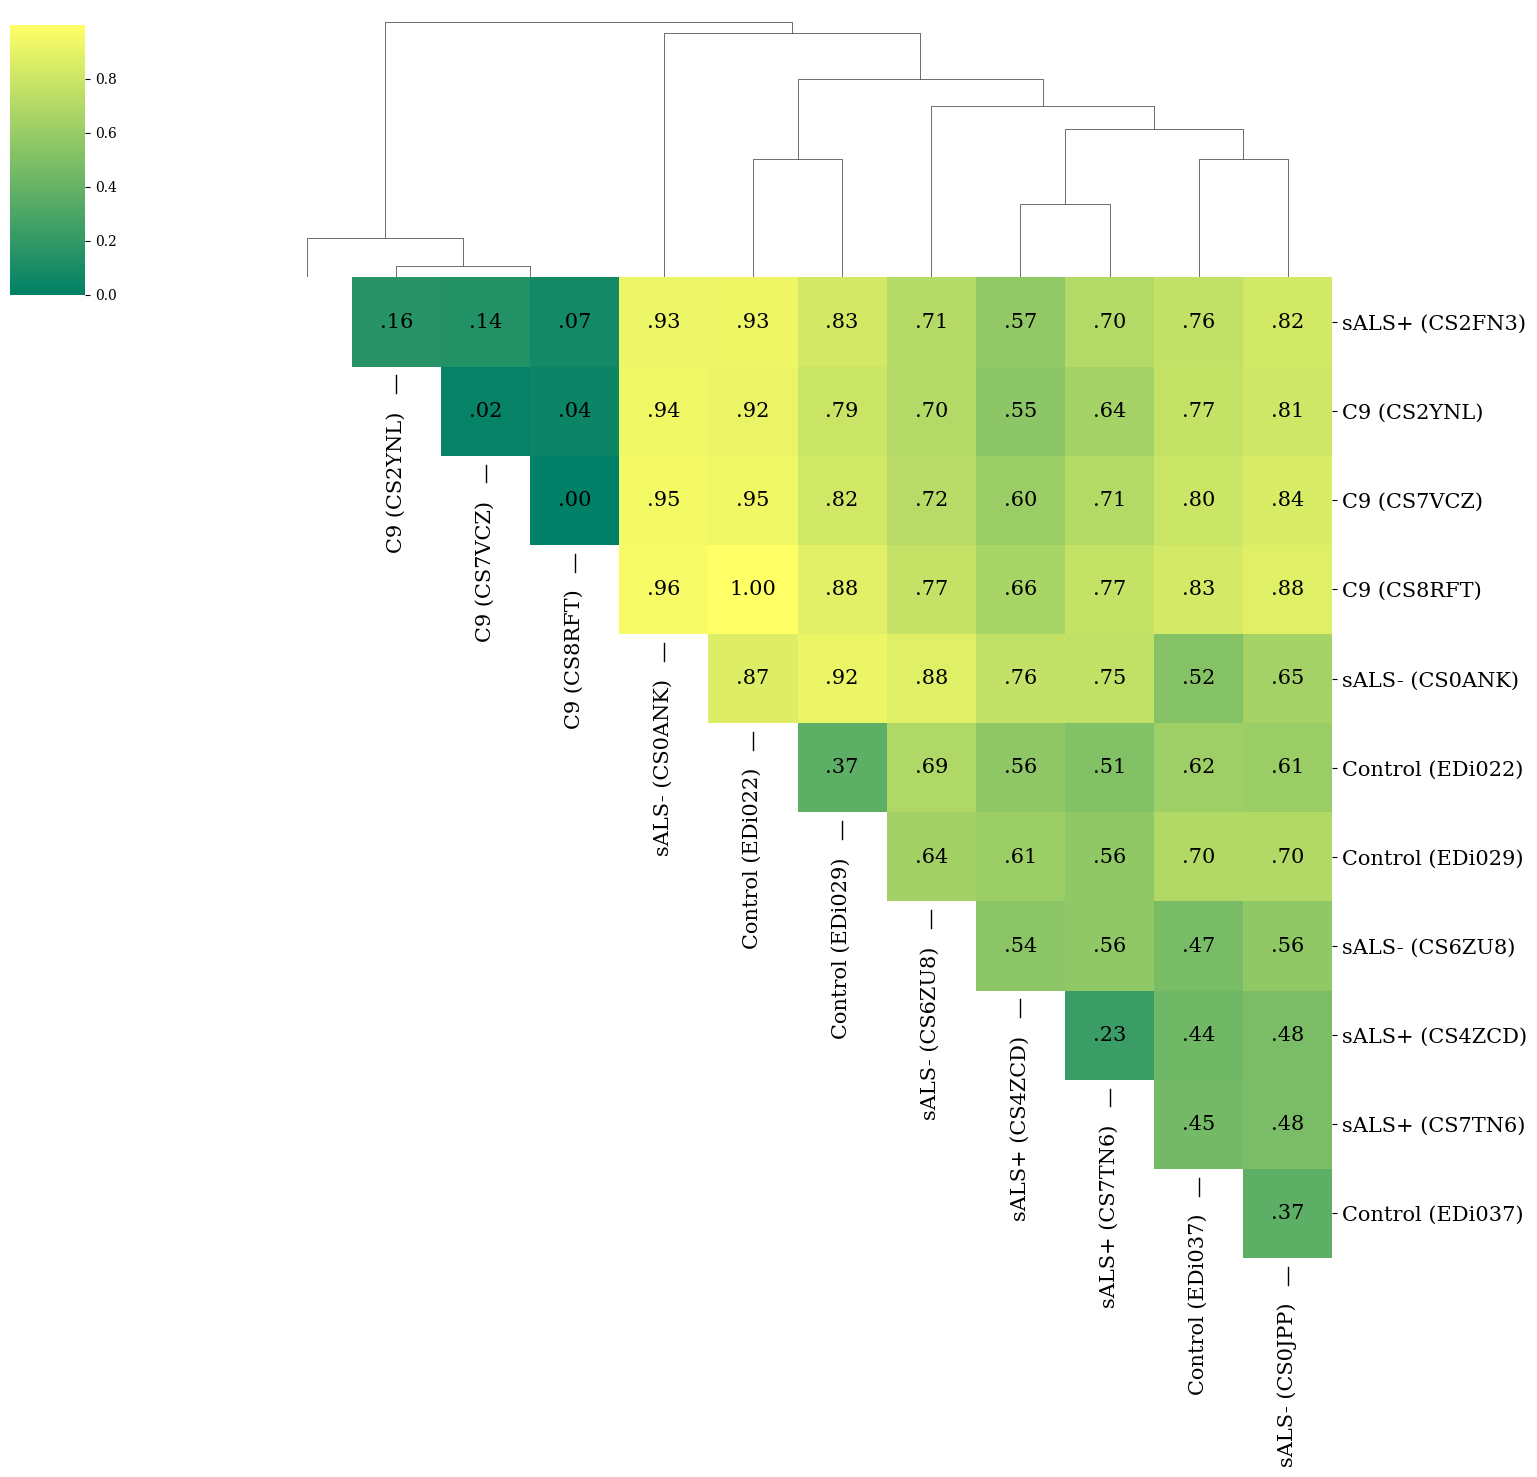

In [7]:
plot_distances_heatmap(df_filtered_tdp43, figsize=(15,15), normalize=True, remove_diagonal=True, show_upper_only=True, cmap='summer', fontsize=15, axis_font_size=15, xticks_position_shift=0, savepath=
"/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne_new/distances/batch1_all_reps_all_cell_lines_Untreated_TDP43_DCP1A/TDP43")

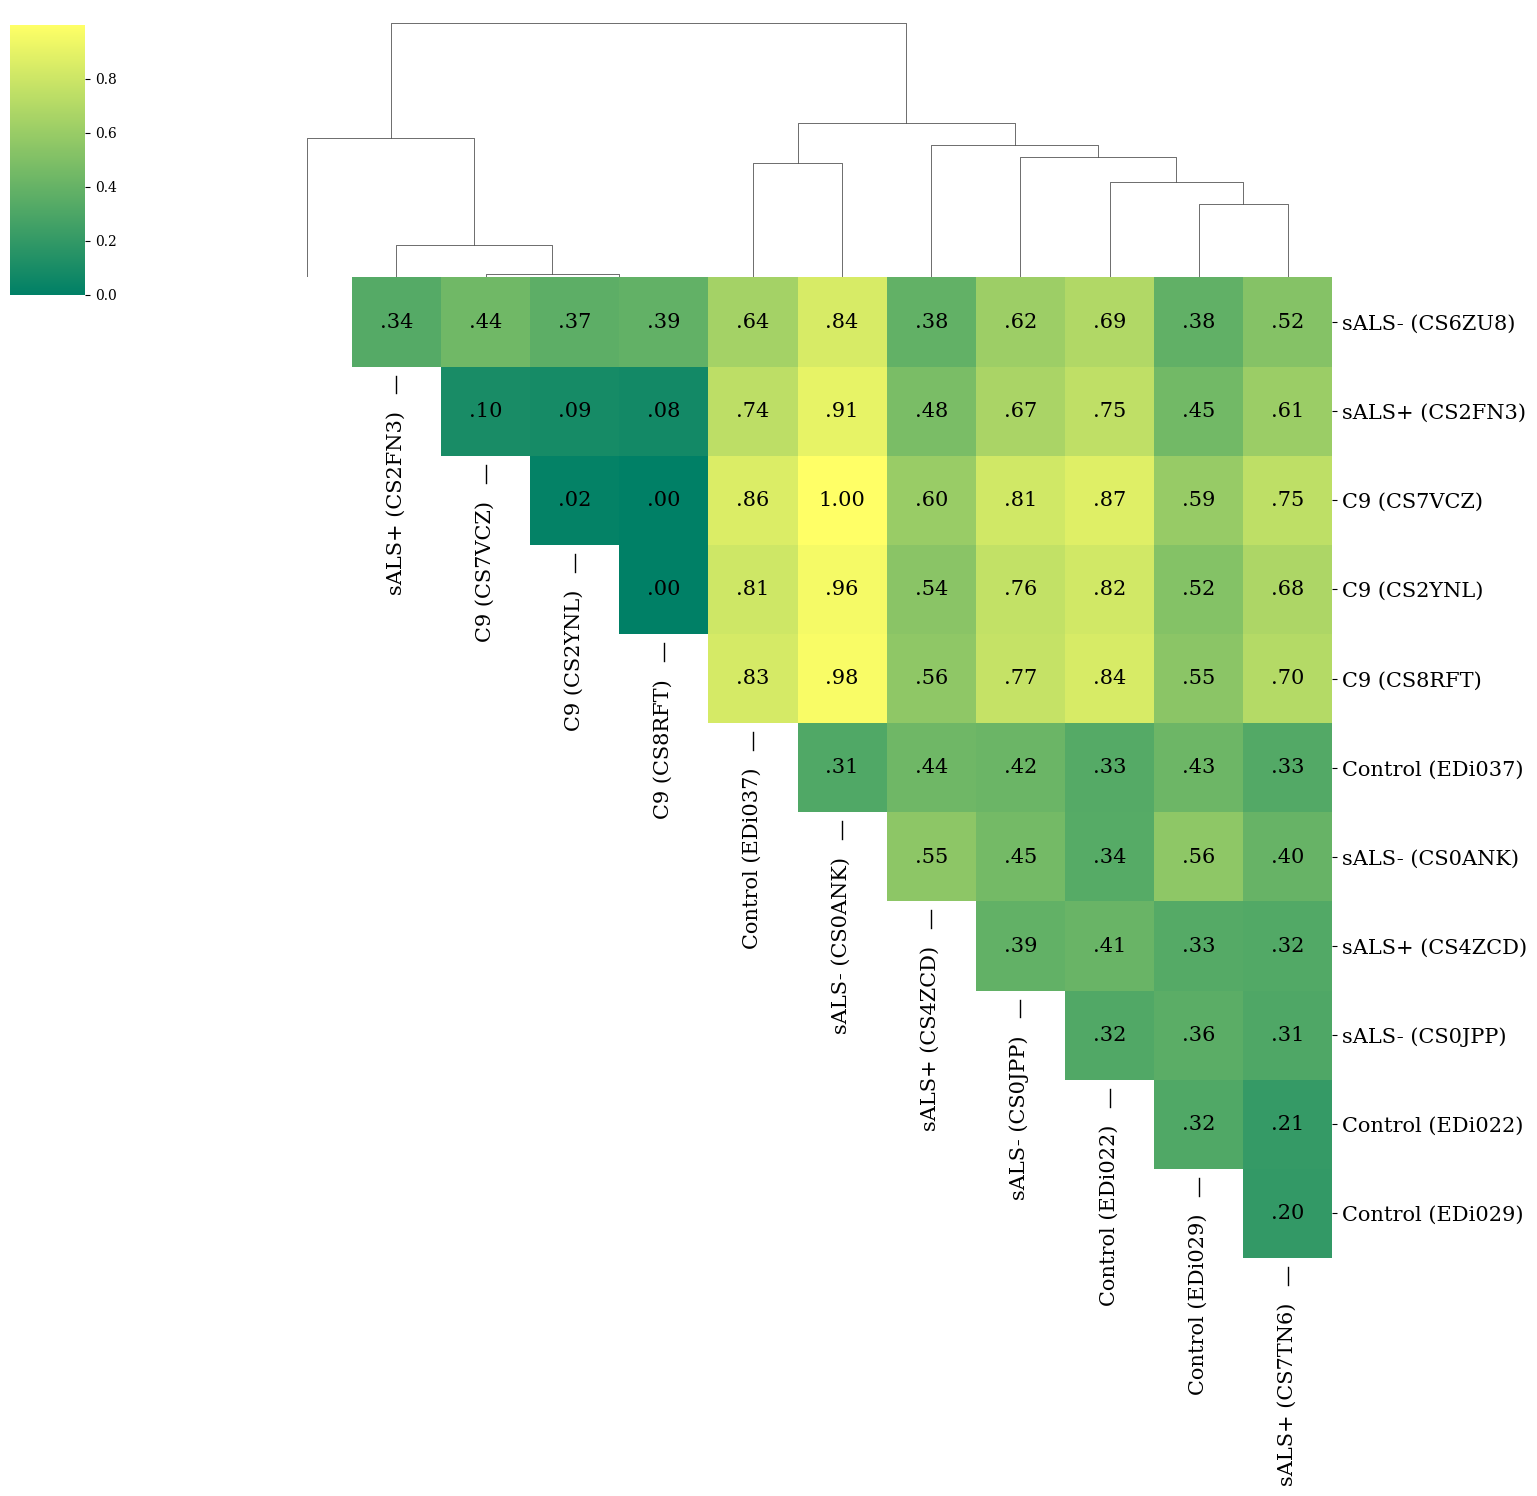

In [8]:
plot_distances_heatmap(df_filtered_dcp1a, figsize=(15,15), normalize=True, remove_diagonal=True, show_upper_only=True, cmap='summer', fontsize=15, axis_font_size=15, xticks_position_shift=0, savepath=
"/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne_new/distances/batch1_all_reps_all_cell_lines_Untreated_TDP43_DCP1A/DCP1A")

# Older Alyssa

## multiplexed

In [ ]:
dist_folder_prev = '/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances'

In [ ]:
df2 = pd.read_csv(f'{dist_folder_prev}/batch1_all_reps_all_cell_lines_all_conditions_all_markers/distances_stats_euclidean_detailed_multiplexed.csv')

In [ ]:
df2.head()

In [ ]:
plot_custom_boxplot(df2)

In [ ]:
plot_dist_histogram(df2)

In [ ]:
plot_replicate_bars_extended(df2)

In [ ]:
plot_distances_heatmap(df2, fmt = ".1f")

In [ ]:
plot_cluster_proximity_network(df2, threshold = df2['p50'].quantile(0.9))

## not mutliplexed

In [9]:
dist_folder_prev = '/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances'

# per patients

df = pd.read_csv(f'{dist_folder_prev}/batch1_all_reps_Controls_sALSPositiveCytoTDP43_sALSNegativeCytoTDP43_c9orf72ALSPatients_all_conditions_without_CD41/distances_stats_euclidean_rep.csv')
df

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p50
0,DAPI_Controls_rep1,DAPI_Controls_rep1,129,8256,0.262671,0.066571,0.446008
1,DAPI_Controls_rep1,DAPI_Controls_rep2,129,15996,0.001063,0.000172,0.489870
2,DAPI_Controls_rep1,DAPI_Controls_rep3,129,9288,0.000291,0.000120,0.530618
3,DAPI_Controls_rep1,DAPI_Controls_rep4,129,20382,0.000251,0.000114,0.530957
4,DAPI_Controls_rep1,DAPI_Controls_rep5,129,18060,0.000238,0.000118,0.476871
...,...,...,...,...,...,...,...
3565,TDP43_sALSPositiveCytoTDP43_rep7,TDP43_sALSPositiveCytoTDP43_rep8,127,12446,0.000190,0.000113,0.665437
3566,TDP43_sALSPositiveCytoTDP43_rep7,TDP43_sALSPositiveCytoTDP43_rep9,127,11938,0.000189,0.000109,0.718668
3567,TDP43_sALSPositiveCytoTDP43_rep8,TDP43_sALSPositiveCytoTDP43_rep8,98,4753,0.000835,0.000122,0.605611
3568,TDP43_sALSPositiveCytoTDP43_rep8,TDP43_sALSPositiveCytoTDP43_rep9,98,9212,0.000183,0.000104,0.677670


In [ ]:
dist_folder_prev = '/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances'

# per group

df = pd.read_csv(f'{dist_folder_prev}/batch1_all_reps_Controls_sALSPositiveCytoTDP43_sALSNegativeCytoTDP43_c9orf72ALSPatients_all_conditions_without_CD41/distances_stats_euclidean.csv')
df

In [10]:
df['marker1'] = df['label1'].str.split(pat='_', n=1).str[0]
df['marker2'] = df['label2'].str.split(pat='_', n=1).str[0]

df['label1'] = df['label1'].str.split(pat='_', n=1).str[1]
df['label2'] = df['label2'].str.split(pat='_', n=1).str[1]
df

,label1,label2,block_size,total_pairs,dist_time_s,stats_time_s,p50,marker1,marker2
0,Controls_rep1,Controls_rep1,129,8256,0.262671,0.066571,0.446008,DAPI,DAPI
1,Controls_rep1,Controls_rep2,129,15996,0.001063,0.000172,0.489870,DAPI,DAPI
2,Controls_rep1,Controls_rep3,129,9288,0.000291,0.000120,0.530618,DAPI,DAPI
3,Controls_rep1,Controls_rep4,129,20382,0.000251,0.000114,0.530957,DAPI,DAPI
4,Controls_rep1,Controls_rep5,129,18060,0.000238,0.000118,0.476871,DAPI,DAPI
...,...,...,...,...,...,...,...,...,...
3565,sALSPositiveCytoTDP43_rep7,sALSPositiveCytoTDP43_rep8,127,12446,0.000190,0.000113,0.665437,TDP43,TDP43
3566,sALSPositiveCytoTDP43_rep7,sALSPositiveCytoTDP43_rep9,127,11938,0.000189,0.000109,0.718668,TDP43,TDP43
3567,sALSPositiveCytoTDP43_rep8,sALSPositiveCytoTDP43_rep8,98,4753,0.000835,0.000122,0.605611,TDP43,TDP43
3568,sALSPositiveCytoTDP43_rep8,sALSPositiveCytoTDP43_rep9,98,9212,0.000183,0.000104,0.677670,TDP43,TDP43


In [11]:
cfg = PlotConfig()
color_mappings = cfg.COLOR_MAPPINGS_ALYSSA  
# build label_map 
label_map = {k: v["alias"] for k, v in color_mappings.items()}

In [12]:
df_filtered_tdp43 = df[(df['marker1'] == 'TDP43') & (df['marker2'] == 'TDP43')]
df_filtered_dcp1a = df[(df['marker1'] == 'DCP1A') & (df['marker2'] == 'DCP1A')]

df_filtered_dapi = df[(df['marker1'] == 'DAPI') & (df['marker2'] == 'DAPI')]

df_filtered_map2 = df[(df['marker1'] == 'Map2') & (df['marker2'] == 'Map2')]

In [13]:
df_filtered_tdp43['label1'] = df_filtered_tdp43['label1'].map(label_map)
df_filtered_tdp43['label2'] = df_filtered_tdp43['label2'].map(label_map)

df_filtered_dcp1a['label1'] = df_filtered_dcp1a['label1'].map(label_map)
df_filtered_dcp1a['label2'] = df_filtered_dcp1a['label2'].map(label_map)


df_filtered_dapi['label1'] = df_filtered_dapi['label1'].map(label_map)
df_filtered_dapi['label2'] = df_filtered_dapi['label2'].map(label_map)


df_filtered_map2['label1'] = df_filtered_map2['label1'].map(label_map)
df_filtered_map2['label2'] = df_filtered_map2['label2'].map(label_map)

/tmp/ipykernel_1794051/3785332791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_tdp43['label1'] = df_filtered_tdp43['label1'].map(label_map)
/tmp/ipykernel_1794051/3785332791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_tdp43['label2'] = df_filtered_tdp43['label2'].map(label_map)
/tmp/ipykernel_1794051/3785332791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

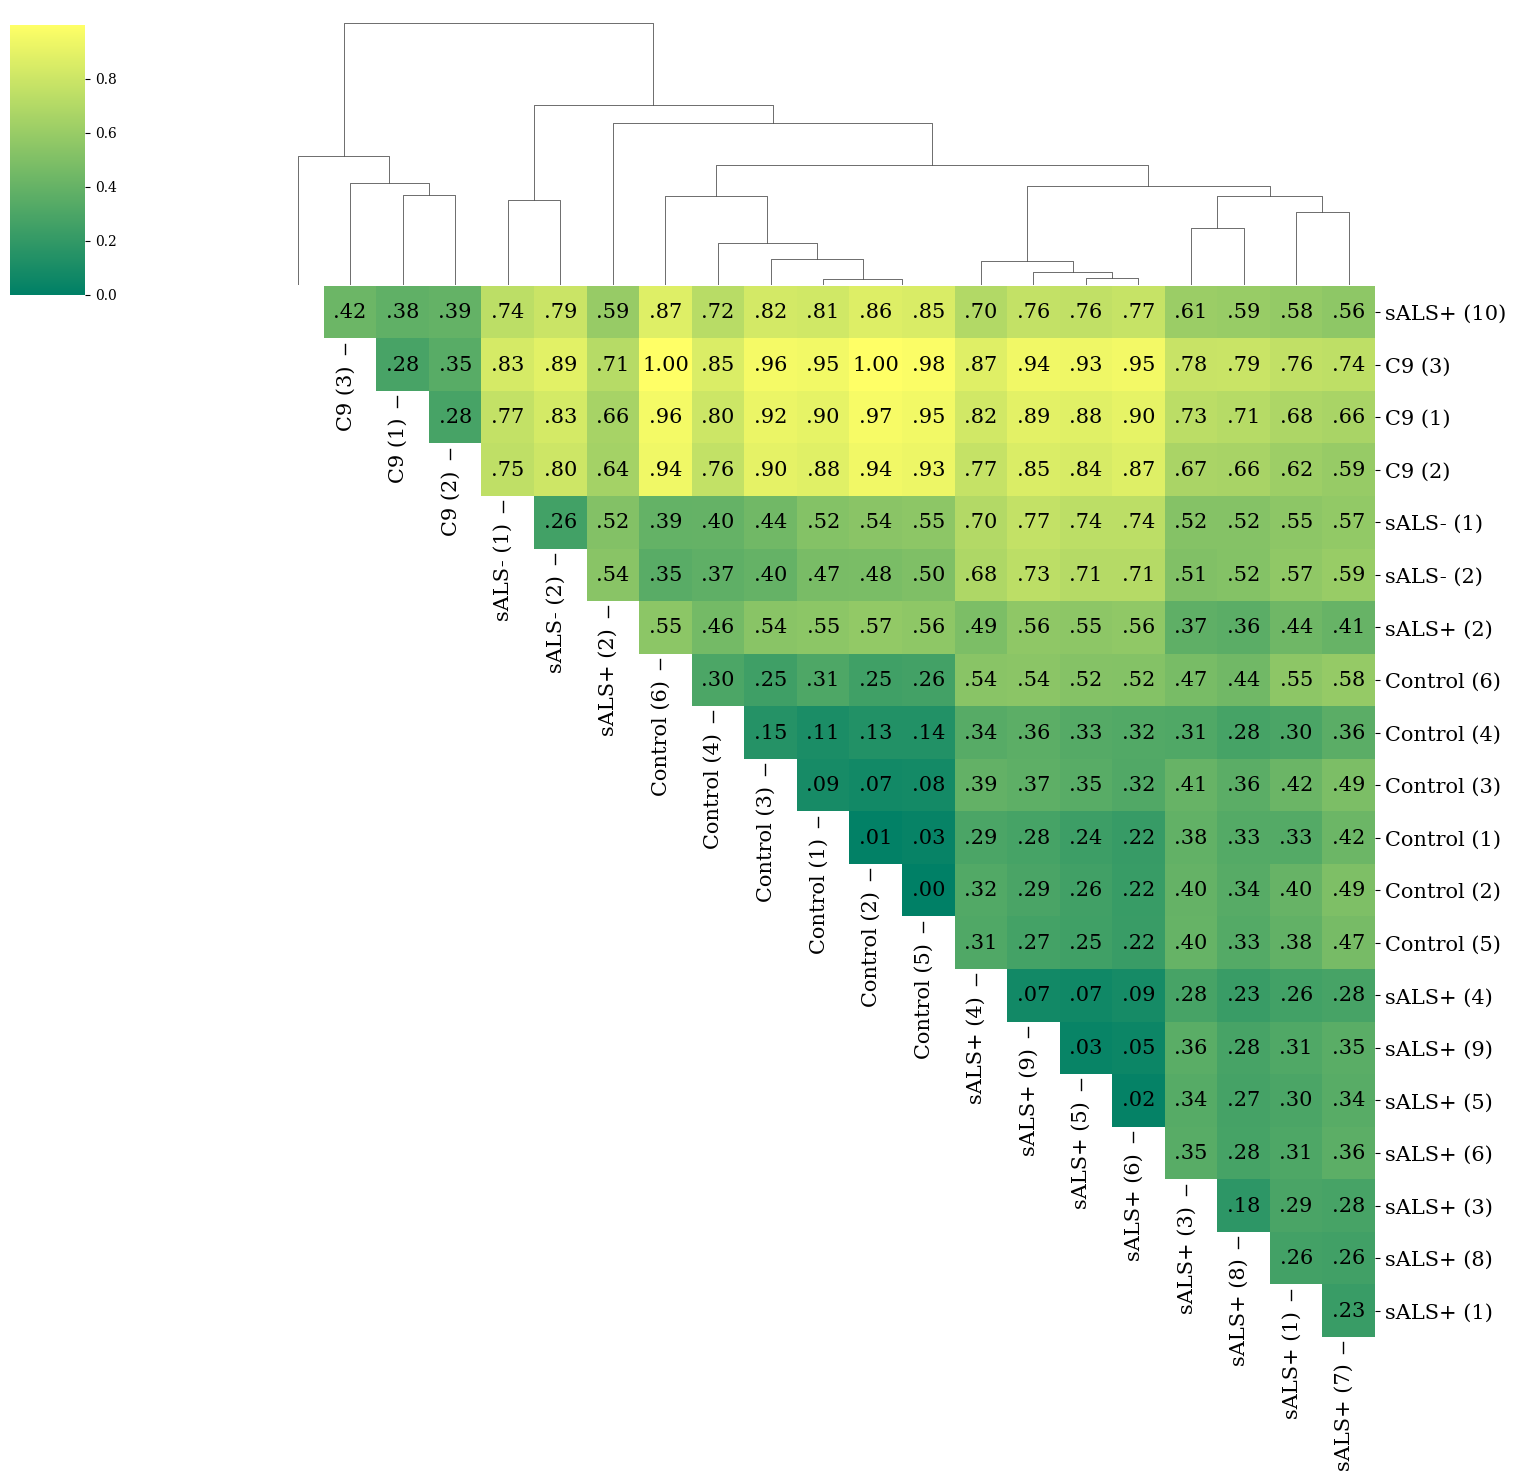

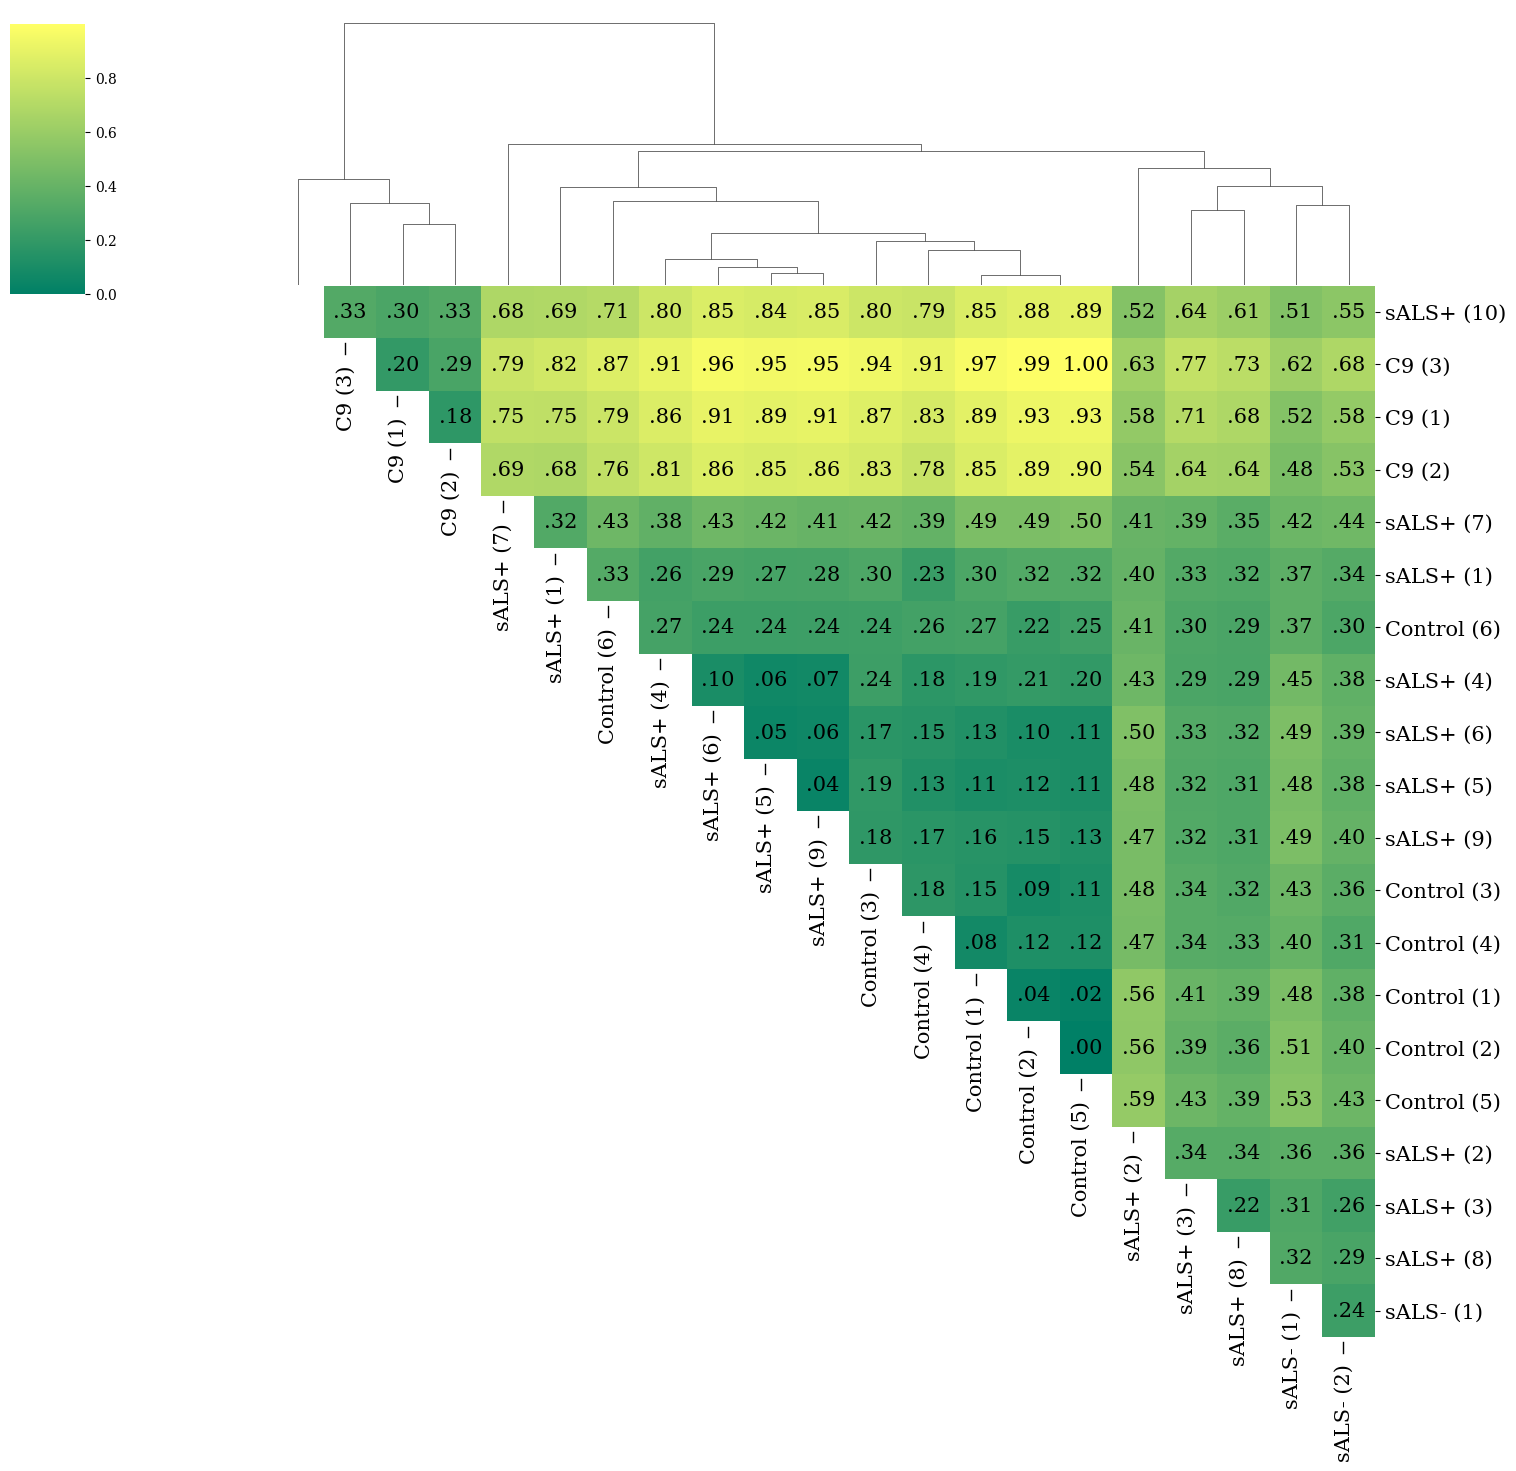

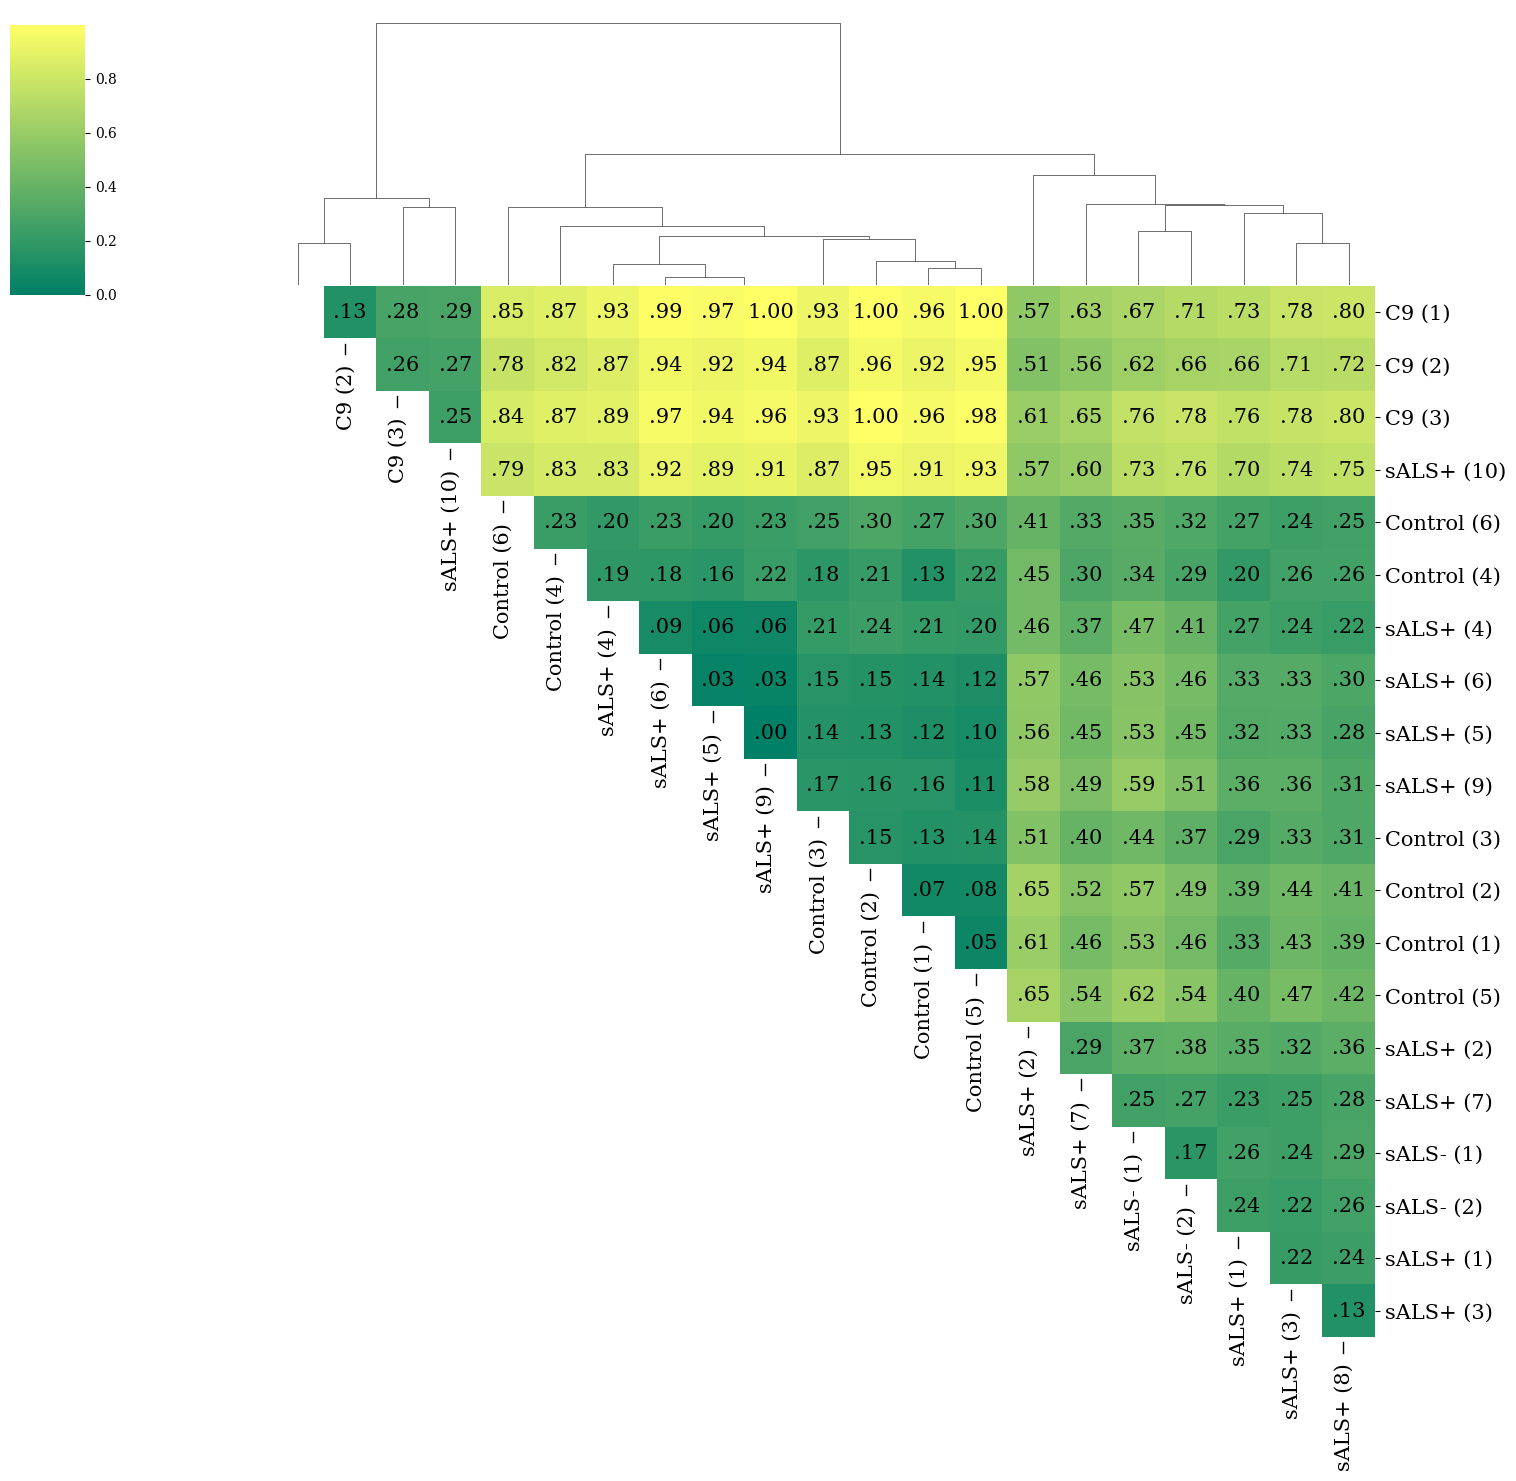

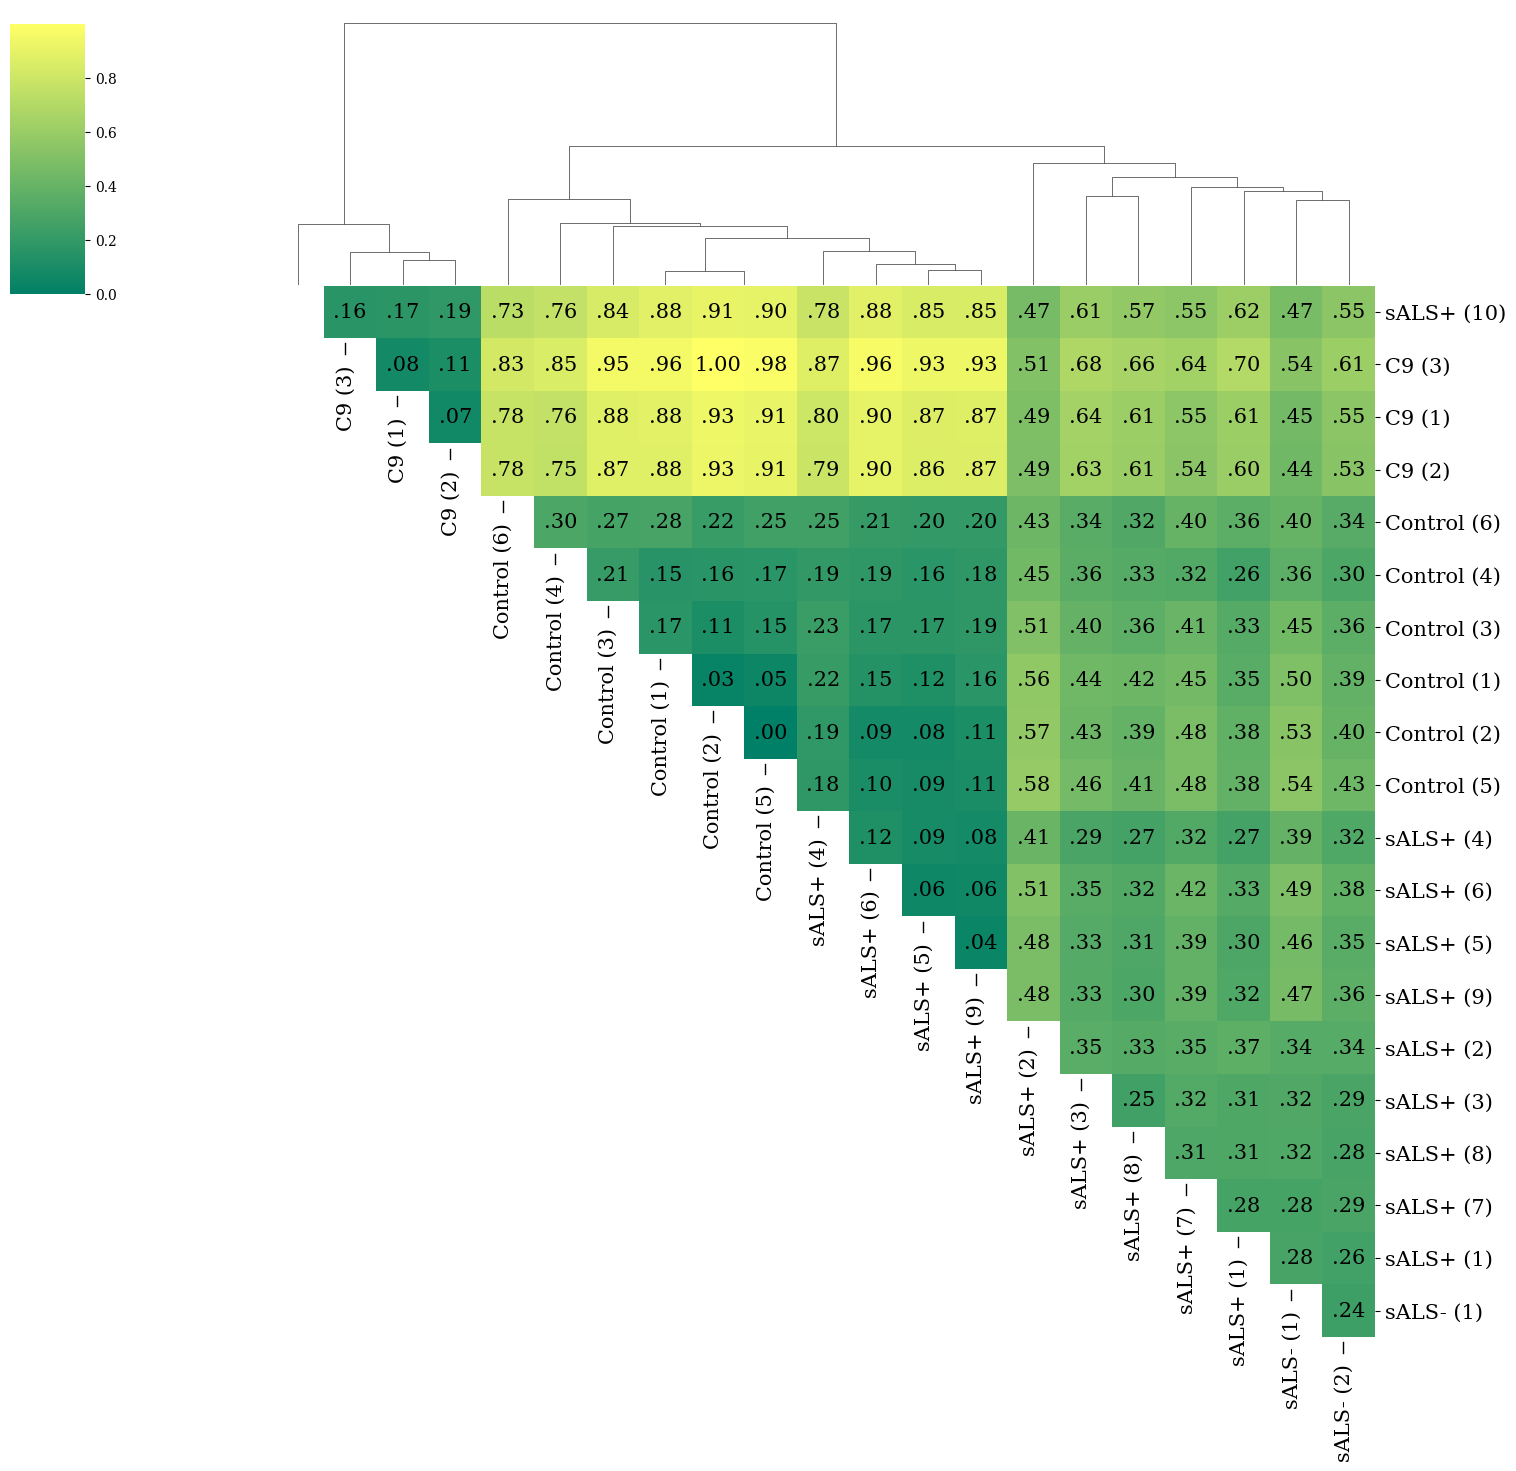

In [14]:
savepath = "/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances/batch1_all_reps_Controls_sALSPositiveCytoTDP43_sALSNegativeCytoTDP43_c9orf72ALSPatients_all_conditions_without_CD41"

plot_distances_heatmap(df_filtered_tdp43, figsize=(15,15), normalize=True, remove_diagonal=True, show_upper_only=True, cmap='summer', fontsize=15,savepath=os.path.join(savepath, "TDP43"))
plot_distances_heatmap(df_filtered_dcp1a, figsize=(15,15), normalize=True, remove_diagonal=True, show_upper_only=True, cmap='summer', fontsize=15,savepath=os.path.join(savepath, "DCP1A"))
plot_distances_heatmap(df_filtered_dapi , figsize=(15,15), normalize=True, remove_diagonal=True, show_upper_only=True, cmap='summer', fontsize=15,savepath=os.path.join(savepath, "DAPI"))
plot_distances_heatmap(df_filtered_map2 , figsize=(15,15), normalize=True, remove_diagonal=True, show_upper_only=True, cmap='summer', fontsize=15,savepath=os.path.join(savepath, "MAP2"))


## Distances between lines & reps for each marker

In [ ]:
dis_path = "/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances/batch1_all_reps_Controls_sALSPositiveCytoTDP43_sALSNegativeCytoTDP43_c9orf72ALSPatients_all_conditions_without_CD41/distances_stats_euclidean.csv"
df = pd.read_csv(dis_path)
df

In [ ]:
# Filter marker-to-marker distances
df['marker1'] = df['label1'].str.split(pat='_', n=1).str[0]
df['marker2'] = df['label2'].str.split(pat='_', n=1).str[0]
df_filtered = df[df['marker1'] == df['marker2']]
df_filtered

In [ ]:
markers = df_filtered['marker1'].unique()
for marker in markers:
    df_marker = df_filtered[df_filtered['marker1'] == marker]
    print(f"Plotting distances for marker: {marker}")
    plot_distances_heatmap(df_marker, fmt = ".1f")

## Distances between gene groups (no reps)

In [ ]:
df_path = "/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/distances_test/batch1_all_reps_Controls_sALSPositiveCytoTDP43_sALSNegativeCytoTDP43_c9orf72ALSPatients_all_conditions_without_CD41/distances_stats_euclidean.csv"

df = pd.read_csv(df_path)
df

In [ ]:
# Filter marker-to-marker distances
df['marker1'] = df['label1'].str.split(pat='_', n=1).str[0]
df['marker2'] = df['label2'].str.split(pat='_', n=1).str[0]
df_filtered = df[df['marker1'] == df['marker2']]
df_filtered

In [ ]:
markers = df_filtered['marker1'].unique()
for marker in markers:
    df_marker = df_filtered[df_filtered['marker1'] == marker]
    print(f"Plotting distances for marker: {marker}")
    plot_distances_heatmap(df_marker, fmt = ".1f")